In [1]:
from google.colab import files
files.download('/content/cleaned_netflix_data (3) (1).csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **LIBRARIES IMPORT**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA LOAD**

In [3]:
df = pd.read_csv('/content/cleaned_netflix_data (3) (1).csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Not Available,Unknown,2021-09-24,2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


# **CLEAN DATA**

In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8088 entries, 0 to 8087
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       8088 non-null   object 
 1   type          8088 non-null   object 
 2   title         8088 non-null   object 
 3   director      8088 non-null   object 
 4   cast          8088 non-null   object 
 5   country       8088 non-null   object 
 6   date_added    8088 non-null   object 
 7   release_year  8088 non-null   float64
 8   rating        8088 non-null   object 
 9   duration      8088 non-null   object 
 10  listed_in     8088 non-null   object 
 11  description   8088 non-null   object 
dtypes: float64(1), object(11)
memory usage: 758.4+ KB


,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


# **VISUALIZATIONS**

**Movies vs TV Shows**

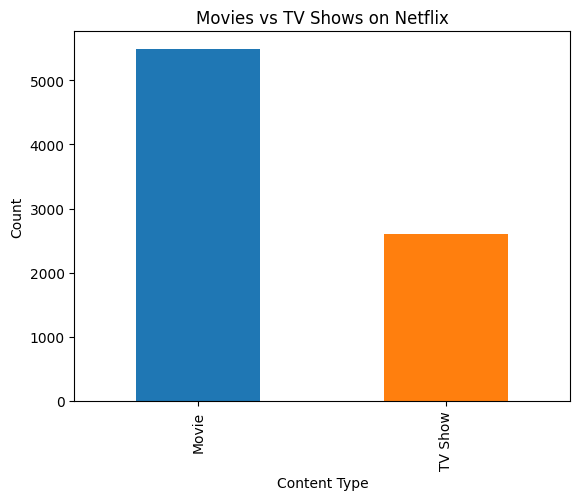

In [5]:
df['type'].value_counts().plot(
    kind='bar',
    color=['#1f77b4', '#ff7f0e']
)

plt.title('Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

**Release Trend**

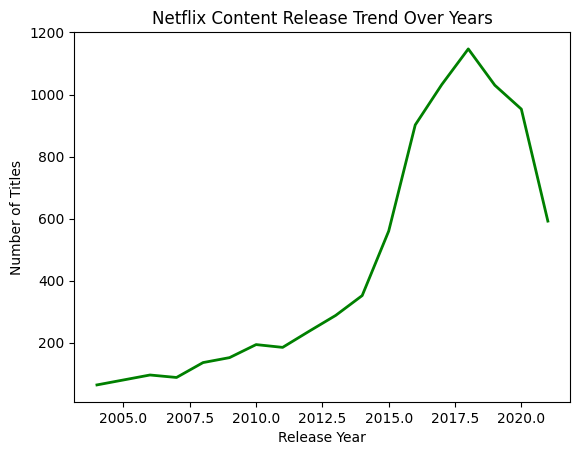

In [6]:
df['release_year'].value_counts().sort_index().plot(
    kind='line',
    color='green',
    linewidth=2
)

plt.title('Netflix Content Release Trend Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

**Ratings**

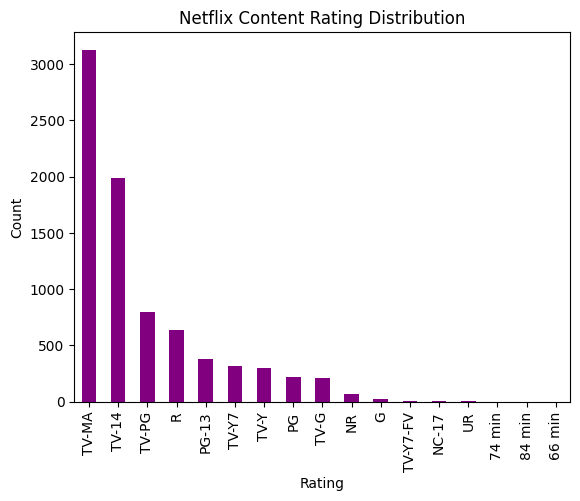

In [8]:
df['rating'].value_counts().plot(
    kind='bar',
    color='purple'
)

plt.title('Netflix Content Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Top Countries**

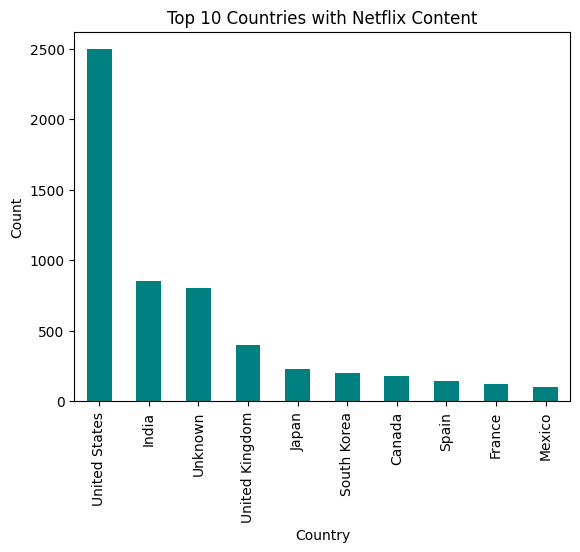

In [10]:
df['country'].value_counts().head(10).plot(
    kind='bar',
    color='teal'
)

plt.title('Top 10 Countries with Netflix Content')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

**Movie Duration**

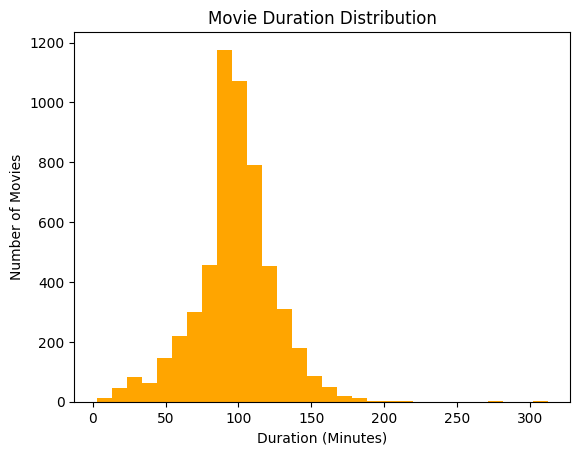

In [12]:
movies = df[df['type'] == 'Movie']
movie_duration = movies['duration'].str.replace(' min', '')
movie_duration = movie_duration[movie_duration.str.isnumeric()].astype(int)

plt.hist(movie_duration, bins=30, color='orange')
plt.title('Movie Duration Distribution')
plt.xlabel('Duration (Minutes)')
plt.ylabel('Number of Movies')
plt.show()

# **Heatmap**

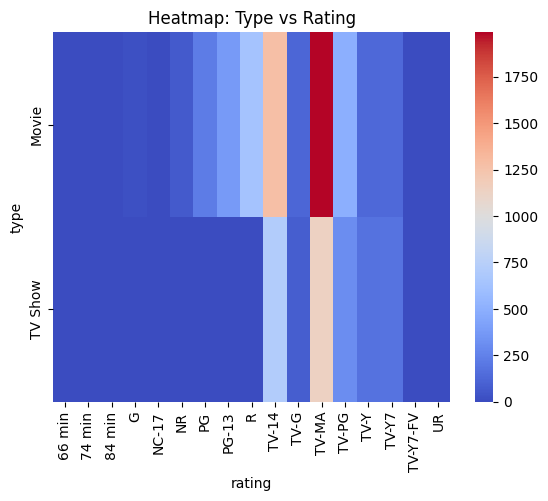

In [13]:
pivot = pd.crosstab(df['type'], df['rating'])
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Heatmap: Type vs Rating')
plt.show()

# **CHATBOT**

In [14]:

def netflix_chatbot(question):
    question = question.lower()

    if "movies" in question:
        return f"Total Movies: {len(df[df['type']=='Movie'])}"
    elif "tv shows" in question:
        return f"Total TV Shows: {len(df[df['type']=='TV Show'])}"
    elif "country" in question:
        return f"Top Country: {df['country'].value_counts().idxmax()}"
    elif "rating" in question:
        return f"Most common rating: {df['rating'].value_counts().idxmax()}"
    elif question == "bye":
        return "Goodbye! Chatbot closed."
    else:
        return "Sorry, I can answer only basic Netflix data questions."

# Chatbot loop
while True:
    user_question = input("Ask a question about Netflix data (type 'bye' to exit): ")
    answer = netflix_chatbot(user_question)
    print(answer)

    if user_question.lower() == "bye":
        break

Ask a question about Netflix data (type 'bye' to exit): How many tv shows are there
Total TV Shows: 2601
Ask a question about Netflix data (type 'bye' to exit): how many movies are there
Total Movies: 5487
Ask a question about Netflix data (type 'bye' to exit): top countries
Sorry, I can answer only basic Netflix data questions.
Ask a question about Netflix data (type 'bye' to exit): rating
Most common rating: TV-MA
Ask a question about Netflix data (type 'bye' to exit): bye
Goodbye! Chatbot closed.
